# Social Generations

## Social Generations and Their Meaning

In this schema, we define social generations — not as familial or biological lineages, but as birth cohorts who share cultural, historical, and social experiences during their formative years. The term refers to groups of people born around the same time who are exposed to similar events, technologies, values, and public discourse, thereby forming a collective identity. [Wikipedia: Social Generation](https://en.wikipedia.org/wiki/Generation#Social_generation)

The idea of social generations emerged in the 19th century in tandem with modernization, industrialization, and mass media, as societies increasingly perceived youth and age cohorts as meaningful units of change. 

The distinction from genealogical “generations” is crucial: social generations emphasize shared historical location and sociocultural imprints rather than strictly chronological succession. 
Wikipedia

Karl Mannheim further formalized this perspective in The Problem of Generations, arguing that a generation gains identity if its members not only are born in the same era, but experience the same impactful events at similar life stages.  Modern generational theory often follows the imprint hypothesis — that significant historical or cultural events leave deep psychological and social marks on youth that distinguish one generation from another. 
Wikipedia

In practice, this lookup table anchors well-known Western social generations (starting from the the Lost Generation and ending with Gen Alpha) by birth-year ranges and key attributes (characteristic, archetype, life principle, symbol). These labels are heuristic devices rather than rigid prescriptions — used to help interpret trends in values, behaviors, and generational dynamics across time.

In [1]:
%xmode minimal
import datajoint as dj

Exception reporting mode: Minimal


In [2]:
schema = dj.Schema('generations')

[2025-10-11 00:32:58,030][INFO]: DataJoint 0.14.6 connected to dev@db:3306


In [3]:
@schema
class Generation(dj.Lookup):
    definition = """
    generation: varchar(16)
    ---
    dob_start: date
    dob_end: date
    characteristic: varchar(255)
    archetype: varchar(16)
    life_principle: varchar(255)
    symbol: varchar(64)
    """

    contents = [
        (
            'Lost Generation',
            '1883-01-01', '1900-12-31',
            'Disillusioned by World War I; sought meaning through art, modernism, and expatriate life.',
            'Nomad',
            'Search for authenticity and self-expression amid disillusionment.',
            'The Great Gatsby',
        ),
        (
            'Greatest',
            '1901-01-01', '1927-12-31',
            'Grew up through the Great Depression and World War II; defined by duty and sacrifice.',
            'Hero',
            'Duty, unity, and collective purpose.',
            'Rosie the Riveter',
        ),
        (
            'Silent',
            '1928-01-01', '1945-12-31',
            'Conformist yet hardworking; valued stability, discipline, and civic responsibility.',
            'Artist',
            'Discipline, craftsmanship, and harmony.',
            'Grey Flannel Suit',
        ),
        (
            'Baby Boomers',
            '1946-01-01', '1964-12-31',
            'Prosperous postwar generation; shaped modern culture, civil rights, and consumerism.',
            'Prophet',
            'Purpose, moral vision, and self-expression.',
            'Woodstock Dove',
        ),
        (
            'Gen X',
            '1965-01-01', '1980-12-31',
            'Independent and skeptical; adapted to globalization and the digital revolution.',
            'Nomad',
            'Self-reliance, adaptability, and realism.',
            'MTV Logo',
        ),
        (
            'Gen Y',
            '1981-01-01', '1996-12-31',
            'Millennials; tech-savvy, idealistic, collaborative, and shaped by the internet age.',
            'Hero',
            'Collaboration, inclusion, and empowerment.',
            'iPhone',
        ),
        (
            'Gen Z',
            '1997-01-01', '2012-12-31',
            'Digital natives; diverse, socially conscious, and fluent in online culture.',
            'Artist',
            'Authenticity, empathy, and self-identity.',
            'TikTok Logo',
        ),
        (
            'Gen Alpha',
            '2013-01-01', '2025-12-31',
            'Born into AI and automation; hyper-connected and globally aware from birth.',
            'Prophet',
            'Innovation, stewardship, and global vision.',
            'AI Assistant',
        ),
    ]


In [4]:
Generation()

generation,dob_start,dob_end,characteristic,archetype,life_principle,symbol
Baby Boomers,1946-01-01,1964-12-31,"Prosperous postwar generation; shaped modern culture, civil rights, and consumerism.",Prophet,"Purpose, moral vision, and self-expression.",Woodstock Dove
Gen Alpha,2013-01-01,2025-12-31,Born into AI and automation; hyper-connected and globally aware from birth.,Prophet,"Innovation, stewardship, and global vision.",AI Assistant
Gen X,1965-01-01,1980-12-31,Independent and skeptical; adapted to globalization and the digital revolution.,Nomad,"Self-reliance, adaptability, and realism.",MTV Logo
Gen Y,1981-01-01,1996-12-31,"Millennials; tech-savvy, idealistic, collaborative, and shaped by the internet age.",Hero,"Collaboration, inclusion, and empowerment.",iPhone
Gen Z,1997-01-01,2012-12-31,"Digital natives; diverse, socially conscious, and fluent in online culture.",Artist,"Authenticity, empathy, and self-identity.",TikTok Logo
Greatest,1901-01-01,1927-12-31,Grew up through the Great Depression and World War II; defined by duty and sacrifice.,Hero,"Duty, unity, and collective purpose.",Rosie the Riveter
Lost Generation,1883-01-01,1900-12-31,"Disillusioned by World War I; sought meaning through art, modernism, and expatriate life.",Nomad,Search for authenticity and self-expression amid disillusionment.,The Great Gatsby
Silent,1928-01-01,1945-12-31,"Conformist yet hardworking; valued stability, discipline, and civic responsibility.",Artist,"Discipline, craftsmanship, and harmony.",Grey Flannel Suit


## Setting Up the Data

Now we'll create a `Person` table with randomly generated data and populate it with 1000 people with birth dates spanning from 1905 to 2024.


In [5]:
from faker import Faker
fake = Faker()

@schema
class Person(dj.Manual):
    definition = """
    person: varchar(12)
    ---
    sex: enum('M','F')
    name: varchar(120)
    dob: date
    """

Person.insert([i,
               *(("M", fake.name_male()) if fake.random_int(0, 1)
                 else ("F", fake.name_female())),
               fake.date_of_birth(minimum_age=1, maximum_age=120)]
              for i in range(1000, 2000)
              )

## Schema Overview

Here's the schema diagram showing both tables:


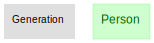

In [6]:
dj.Diagram(schema)

## Query 1: Assigning Persons to Generations

**Problem**: Given a `Person` table with birth dates and a `Generation` table with date ranges, how do we assign each person to their corresponding generation?

**Challenge**: The two tables have no common attributes (no foreign key relationship), yet we need to match them based on whether a person's birth date falls within a generation's date range.


### Solution

In [10]:
person_gen = (Person * Generation & 'dob between dob_start and dob_end').proj(
    'name', 'sex', 'dob', 'generation')
person_gen

person,generation,sex,name,dob
1000,Silent,F,Jamie Jones,1935-06-03
1001,Greatest,F,Tiffany Wells,1912-11-28
1002,Gen Y,F,Christine Bean,1986-02-17
1003,Gen Alpha,M,Aaron Green,2019-10-31
1004,Gen Y,F,Marisa Walters,1981-02-18
1005,Greatest,F,Judy Clark,1911-05-06
1006,Gen Z,F,Jasmine Richards,2001-06-10
1007,Gen Alpha,M,Justin Marshall,2021-09-16
1008,Baby Boomers,F,Kathleen Martin,1957-08-29
1009,Gen Y,M,Victor Davis,1996-03-13


### Explanation

The query combines three DataJoint operators in sequence:

```python
person_gen = (Person * Generation & 'dob between dob_start and dob_end').proj(
    'name', 'sex', 'dob', 'generation')
```

#### Step 1: Join (`Person * Generation`)

The **join operator** (`*`) combines the two tables. Since they share no common attributes, it produces a **Cartesian product**: every person is paired with every generation.

- Input: 1000 people × 8 generations
- Output: 8000 person-generation pairs

**Why this works**: We intentionally create all possible combinations so we can test each person against every generation's date range.

#### Step 2: Restriction (`& 'dob between dob_start and dob_end'`)

The **restriction operator** (`&`) filters the 8000 pairs to keep only those where the person's birth date falls within the generation's date range.

- Input: 8000 person-generation pairs
- Output: ~1000 matching pairs (one per person)

**The matching logic**: For each pair, check if `dob` is between `dob_start` and `dob_end`. Only matching pairs survive.

#### Step 3: Projection (`.proj('name', 'sex', 'dob', 'generation')`)

The **projection operator** selects which attributes to display in the final result:
- From `Person`: `name`, `sex`, `dob`
- From `Generation`: `generation`

The primary key `(person, generation)` is automatically preserved, ensuring each entity is uniquely identified.

**Why project**: We don't need `dob_start`, `dob_end`, or other generation attributes in the final result—just the generation label.

#### Algebraic Closure

Each operation returns a valid query expression:
1. `Person * Generation` → query expression (all combinations)
2. `(...) & '...'` → query expression (filtered combinations)
3. `(...).proj(...)` → query expression (selected attributes)

This composability is **algebraic closure**: operators on query expressions always produce new query expressions.


### SQL Equivalent

If we were to write this query in standard SQL, it would look like:

```sql
SELECT person, name, sex, dob, generation
FROM person
JOIN generation
WHERE dob BETWEEN dob_start AND dob_end;
```

**Key parallels**:
- `Person * Generation` → `JOIN` (Cross Join or Cartesian product)
- `& 'dob between ...'` → `WHERE ... BETWEEN` (filtering condition)
- `.proj(...)` → `SELECT` clause (column selection)

**The DataJoint advantage**: The query syntax is more concise and the operators compose naturally, making the logic easier to read and understand.


## Query 2: Counting People per Generation

**Problem**: Now that we have assigned people to generations (stored in `person_gen`), how do we count how many people belong to each generation?

**Challenge**: We want to add a count to each generation entity, but we don't want to lose the generation entities themselves. We need to **annotate** generations with counts, not transform them into a summary table.


### Solution


In [15]:
# persons in each generation
Generation.aggr(person_gen, 'dob_start', 'dob_end', person_count='count(*)')

generation,dob_start,dob_end,person_count calculated attribute
Baby Boomers,1946-01-01,1964-12-31,166
Gen Alpha,2013-01-01,2025-12-31,95
Gen X,1965-01-01,1980-12-31,141
Gen Y,1981-01-01,1996-12-31,135
Gen Z,1997-01-01,2012-12-31,136
Greatest,1901-01-01,1927-12-31,181
Silent,1928-01-01,1945-12-31,146


### Explanation

DataJoint's binary aggregation operator has a fundamentally different design than SQL's `GROUP BY`. Instead of transforming entities, it **annotates** them.

```python
Generation.aggr(person_gen, 'dob_start', 'dob_end', person_count='count(*)')
```

#### The Form: `A.aggr(B, ...)`

- **A** (first operand): The entity set to annotate — `Generation`
- **B** (second operand): The entity set to aggregate — `person_gen`
- **Additional arguments**: Attributes to include and computed aggregations

#### What Happens Internally

1. **Implicit Join**: DataJoint performs a LEFT JOIN from `Generation` to `person_gen` on their common attribute (`generation`)

2. **Implicit Grouping**: The operation automatically groups by `Generation`'s primary key

3. **Aggregation**: For each generation, it computes `person_count='count(*)'`

4. **Annotation**: Each Generation entity is enriched with the computed attribute

5. **Attribute Selection**: We include `'dob_start'` and `'dob_end'` to show date ranges alongside counts

#### Key Properties

**Entity Preservation**: The result is still a set of `Generation` entities with the same primary key and same number of rows (8 generations). The entity type hasn't changed.

**Zero-Count Handling**: Generations with no matching people appear with `person_count=0` (because `aggr` uses LEFT JOIN). In this example, "Lost Generation" (1883-1900) has 0 people since all randomly generated birth dates fell outside that range.

**Composability**: The result remains a valid Generation entity set, so it can be used in further queries:
```python
# Restrict to large generations
Generation.aggr(person_gen, person_count='count(*)') & 'person_count > 150'

# Join with other tables
OtherTable * Generation.aggr(person_gen, person_count='count(*)')
```

#### Why This Design Matters

This solves the "entity fragmentation" problem common in SQL. When analyzing data, you often want to **enrich** your understanding of entities rather than **transform** them into disconnected summary statistics.

DataJoint's `aggr` keeps you grounded in the conceptual model: you're still working with Generations, just with additional computed information.


### SQL Equivalent

The equivalent SQL query would be:

```sql
SELECT 
    generation,
    dob_start,
    dob_end,
    COUNT(person) AS person_count
FROM generation 
LEFT JOIN person_gen p
WHERE dob BETWEEN dob_start AND dob_end
GROUP BY generation
```

#### Key Differences

**Grouping Specification**: 
- SQL requires explicit `GROUP BY` listing the aggregation column -- the new primary key of the result
- DataJoint automatically groups by the primary key of the first operand (`Generation`)

**Entity Integrity**:
- SQL `GROUP BY` can create arbitrary groupings that may not represent valid entities
- DataJoint enforces that the result is always a well-formed entity set

**Conceptual Clarity**:
- SQL's `GROUP BY` transforms data into a new structure
- DataJoint's `aggr` annotates existing entities with additional information

The DataJoint approach ensures that entity integrity is always preserved, making queries more intuitive and less error-prone.


In [ ]:
# If you need to rerun this notebook drop the schema and re-run the notebook from the beginning
# schema.drop()